<a href="https://colab.research.google.com/github/vishwaram47/Student-Payment-Behaviour-Prediction/blob/main/Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("Student_Info_after_cleaning.csv")
df.head()

,Roll,Adm,Std,Sec,Age,Gen,Place,Faage,Faedu,Faocc,...,Tran,Phy,Men,Sleep,Goout,Phone,Somed,Phohr,Fee,Percentage
0,6A001,1416,6,1,11,0,23,51,5,3,...,2,4,5,7,0,0,1,0.0,1,91.6
1,6A002,1425,6,1,11,0,1,38,6,2,...,4,5,5,9,1,0,1,0.0,1,62.4
2,6A003,1417,6,1,10,0,34,44,5,2,...,2,5,5,9,1,0,1,0.0,1,56.8
3,6A004,1410,6,1,11,0,5,37,6,3,...,2,3,2,8,2,0,2,1.0,1,92.8
4,6A005,1421,6,1,11,0,23,36,8,6,...,2,5,5,8,1,1,3,1.0,1,84.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 48 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Roll        343 non-null    object 
 1   Adm         343 non-null    int64  
 2   Std         343 non-null    int64  
 3   Sec         343 non-null    int64  
 4   Age         343 non-null    int64  
 5   Gen         343 non-null    int64  
 6   Place       343 non-null    int64  
 7   Faage       343 non-null    int64  
 8   Faedu       343 non-null    int64  
 9   Faocc       343 non-null    int64  
 10  Fasal       343 non-null    int64  
 11  Moage       343 non-null    int64  
 12  Moedu       343 non-null    int64  
 13  Moocc       343 non-null    int64  
 14  Mosal       343 non-null    int64  
 15  Stay        343 non-null    int64  
 16  Famtyp      343 non-null    int64  
 17  Count       343 non-null    int64  
 18  Pamas       343 non-null    int64  
 19  Famrel      343 non-null    i

In [ ]:
df.describe(include='all')

,Roll,Adm,Std,Sec,Age,Gen,Place,Faage,Faedu,Faocc,...,Tran,Phy,Men,Sleep,Goout,Phone,Somed,Phohr,Fee,Percentage
count,343,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,...,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000
unique,343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,6A001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1124.644315,8.851312,1.906706,13.688047,0.618076,10.667638,44.163265,5.489796,3.437318,...,2.177843,4.198251,4.099125,7.976676,1.230321,0.288630,1.793003,0.807580,0.740525,63.936793
std,NaN,338.992878,2.041540,0.774247,1.968777,0.486568,10.004109,6.629470,1.836691,1.627974,...,0.988459,1.195164,1.275763,0.996798,1.935211,0.453787,1.214319,1.010617,0.438987,18.364699
min,NaN,523.000000,6.000000,1.000000,10.000000,0.000000,1.000000,-1.000000,1.000000,-1.000000,...,1.000000,1.000000,1.000000,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,13.200000
25%,NaN,689.500000,7.000000,1.000000,12.000000,0.000000,1.000000,41.000000,4.500000,2.000000,...,2.000000,4.000000,3.000000,7.000000,0.000000,0.000000,1.000000,0.000000,0.000000,52.250000
50%,NaN,1237.000000,9.000000,2.000000,14.000000,1.000000,5.000000,44.000000,5.000000,3.000000,...,2.000000,5.000000,5.000000,8.000000,0.000000,0.000000,1.000000,1.000000,1.000000,65.000000
75%,NaN,1400.500000,11.000000,3.000000,15.000000,1.000000,21.000000,48.000000,6.000000,5.000000,...,2.000000,5.000000,5.000000,8.000000,1.500000,1.000000,2.000000,1.000000,1.000000,77.000000


In [ ]:
df.columns[df.isnull().sum()>0]

Index([], dtype='object')

In [ ]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Adm,Std,Sec,Age,Gen,Place,Faage,Faedu,Faocc,Fasal,...,Tran,Phy,Men,Sleep,Goout,Phone,Somed,Phohr,Fee,Percentage
0,1416,6,1,11,0,23,51,5,3,5,...,2,4,5,7,0,0,1,0.0,1,91.6
1,1425,6,1,11,0,1,38,6,2,3,...,4,5,5,9,1,0,1,0.0,1,62.4
2,1417,6,1,10,0,34,44,5,2,6,...,2,5,5,9,1,0,1,0.0,1,56.8
3,1410,6,1,11,0,5,37,6,3,2,...,2,3,2,8,2,0,2,1.0,1,92.8
4,1421,6,1,11,0,23,36,8,6,6,...,2,5,5,8,1,1,3,1.0,1,84.0


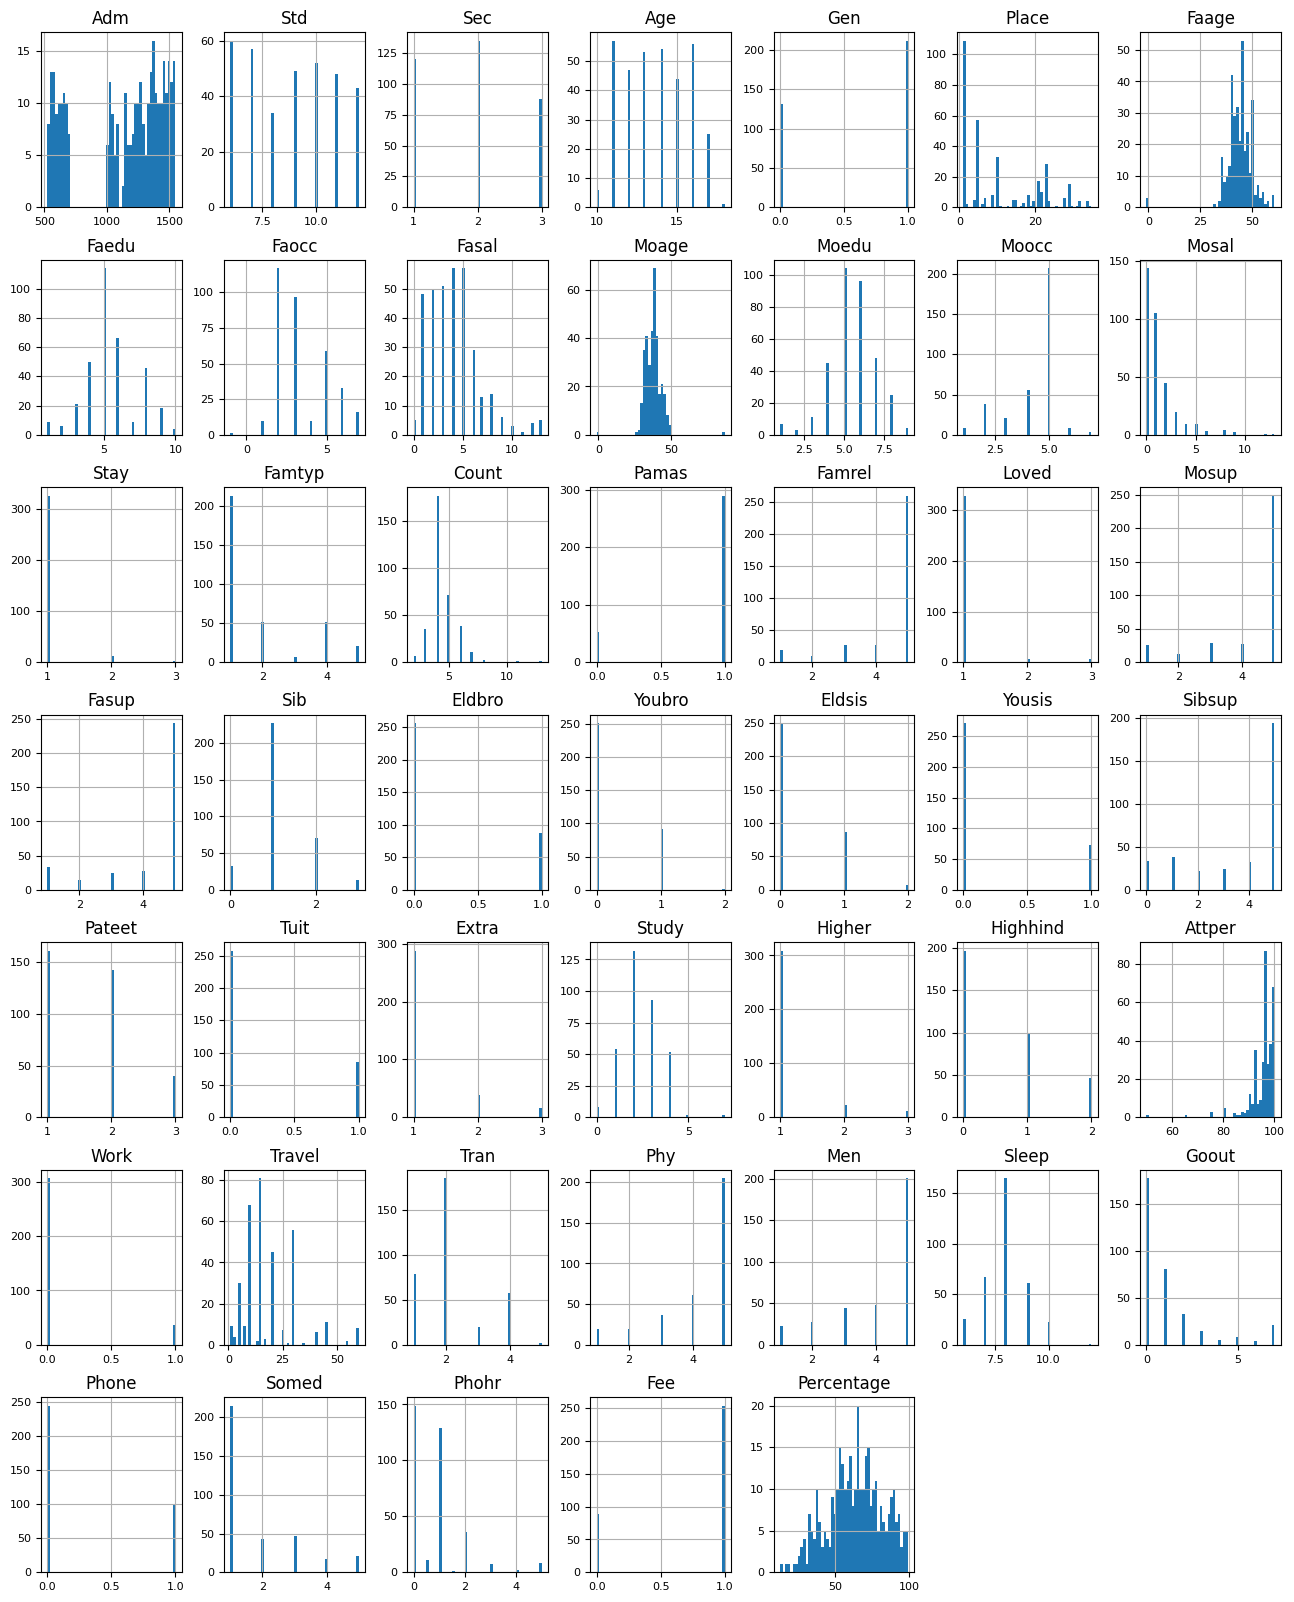

In [ ]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [ ]:
df_num_corr = df_num.corr()['Percentage'][:-1]

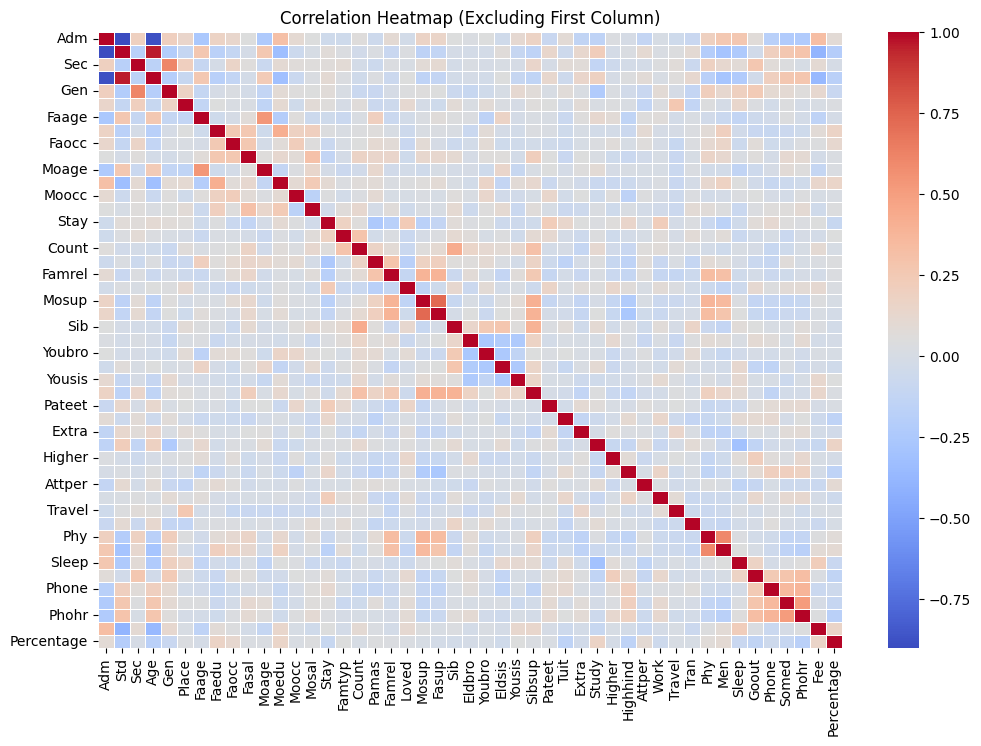

In [ ]:
correlation_matrix = df.iloc[:, 1:].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap (Excluding First Column)')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X=df.iloc[:,1:-2]
Fee=df.iloc[:,-2]
Per=df.iloc[:,-1]

In [ ]:
X.head()

,Adm,Std,Sec,Age,Gen,Place,Faage,Faedu,Faocc,Fasal,...,Work,Travel,Tran,Phy,Men,Sleep,Goout,Phone,Somed,Phohr
0,1416,6,1,11,0,23,51,5,3,5,...,0,55.0,2,4,5,7,0,0,1,0.0
1,1425,6,1,11,0,1,38,6,2,3,...,0,15.0,4,5,5,9,1,0,1,0.0
2,1417,6,1,10,0,34,44,5,2,6,...,0,1.0,2,5,5,9,1,0,1,0.0
3,1410,6,1,11,0,5,37,6,3,2,...,0,5.0,2,3,2,8,2,0,2,1.0
4,1421,6,1,11,0,23,36,8,6,6,...,0,30.0,2,5,5,8,1,1,3,1.0


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,Fee,test_size=0.2,random_state=42)

In [ ]:
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)
fee_pred=clf.predict(X_test)
accuracy = accuracy_score(y_test, fee_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, fee_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, fee_pred))

Accuracy: 0.782608695652174
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.50      0.55        18
           1       0.83      0.88      0.86        51

    accuracy                           0.78        69
   macro avg       0.72      0.69      0.70        69
weighted avg       0.77      0.78      0.78        69

Confusion Matrix:
[[ 9  9]
 [ 6 45]]


In [ ]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
fee_rf=rfc.predict(X_test)
print(classification_report(y_test, fee_rf))
print(confusion_matrix(y_test, fee_rf))

              precision    recall  f1-score   support

           0       0.83      0.28      0.42        18
           1       0.79      0.98      0.88        51

    accuracy                           0.80        69
   macro avg       0.81      0.63      0.65        69
weighted avg       0.80      0.80      0.76        69

[[ 5 13]
 [ 1 50]]


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming X contains your features and y contains your target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Fee, test_size=0.2, random_state=42)

# Create the XGBoost Classifier
xgb_classifier = XGBClassifier()

# Train the classifier on the training data
xgb_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_xgb = xgb_classifier.predict(X_test)

# Evaluate the classifier's performance
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Classifier Accuracy:", accuracy_xgb)

# Print classification report
print("XGBoost Classifier Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Print confusion matrix
print("XGBoost Classifier Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))


XGBoost Classifier Accuracy: 0.782608695652174
XGBoost Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.33      0.44        18
           1       0.80      0.94      0.86        51

    accuracy                           0.78        69
   macro avg       0.73      0.64      0.65        69
weighted avg       0.77      0.78      0.76        69

XGBoost Classifier Confusion Matrix:
[[ 6 12]
 [ 3 48]]


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming X contains your features and y contains your target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Fee, test_size=0.2, random_state=42)

# Create the Support Vector Machines (SVM) Classifier
svm_classifier = SVC()

# Train the classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the classifier's performance
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Classifier Accuracy:", accuracy_svm)

# Print classification report
print("SVM Classifier Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Print confusion matrix
print("SVM Classifier Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))


SVM Classifier Accuracy: 0.7391304347826086
SVM Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.74      1.00      0.85        51

    accuracy                           0.74        69
   macro avg       0.37      0.50      0.42        69
weighted avg       0.55      0.74      0.63        69

SVM Classifier Confusion Matrix:
[[ 0 18]
 [ 0 51]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#SMOTE for Fee

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split




In [ ]:
smote = SMOTE(sampling_strategy={0: 203,1:203},random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)



In [ ]:
(y_train_resampled==0).sum()

203

In [ ]:

train_resampled_df = pd.concat([pd.DataFrame(X_train_resampled), pd.DataFrame(y_train_resampled)], axis=1)

In [ ]:
(Fee==0).sum()

89

In [ ]:
train_resampled_df

,Adm,Std,Sec,Age,Gen,Place,Faage,Faedu,Faocc,Fasal,...,Travel,Tran,Phy,Men,Sleep,Goout,Phone,Somed,Phohr,Fee
0,1517,7,3,12,1,23,41,5,5,3,...,30.000000,2,3,3,8,2,0,1,0.000000,1
1,1418,6,1,11,0,10,35,8,1,6,...,40.000000,2,5,5,9,1,1,5,1.000000,1
2,1270,8,2,12,1,5,51,9,4,13,...,10.000000,1,3,5,8,1,0,1,1.000000,1
3,578,12,2,17,0,10,43,9,5,1,...,5.000000,2,5,3,6,0,0,1,0.000000,0
4,532,12,1,17,0,1,57,4,2,10,...,10.000000,4,4,3,7,0,0,1,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,577,12,2,16,0,9,51,5,2,4,...,17.949354,2,4,4,8,0,0,2,0.820258,0
402,579,12,2,16,0,5,52,4,2,2,...,10.105536,1,5,2,6,0,0,1,1.000000,0
403,533,12,1,16,0,5,48,2,2,1,...,6.592805,1,4,3,6,0,0,1,0.256629,0
404,588,12,2,16,1,11,45,5,3,7,...,15.000000,2,5,5,8,6,1,2,1.000000,0


In [ ]:
X_new=train_resampled_df.iloc[:,:-1]
fee_new=train_resampled_df.iloc[:,-1]

In [ ]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, fee_new, test_size=0.2, random_state=42)

# Create the XGBoost Classifier
xgb_classifier = XGBClassifier()

# Train the classifier on the training data
xgb_classifier.fit(X_train_new, y_train_new)

# Make predictions on the testing data
y_pred_xgb = xgb_classifier.predict(X_test)

# Evaluate the classifier's performance
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Classifier Accuracy:", accuracy_xgb)

# Print classification report
print("XGBoost Classifier Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Print confusion matrix
print("XGBoost Classifier Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

XGBoost Classifier Accuracy: 0.7971014492753623
XGBoost Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.50      0.56        18
           1       0.84      0.90      0.87        51

    accuracy                           0.80        69
   macro avg       0.74      0.70      0.72        69
weighted avg       0.79      0.80      0.79        69

XGBoost Classifier Confusion Matrix:
[[ 9  9]
 [ 5 46]]


In [ ]:
clf=DecisionTreeClassifier()
clf.fit(X_train_new,y_train_new)
fee_pred_new=clf.predict(X_test)
accuracy = accuracy_score(y_test, fee_pred_new)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, fee_pred_new))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, fee_pred_new))

Accuracy: 0.7681159420289855
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.50      0.53        18
           1       0.83      0.86      0.85        51

    accuracy                           0.77        69
   macro avg       0.70      0.68      0.69        69
weighted avg       0.76      0.77      0.76        69

Confusion Matrix:
[[ 9  9]
 [ 7 44]]


In [ ]:
df[df.Faage==-1]

,Roll,Adm,Std,Sec,Age,Gen,Place,Faage,Faedu,Faocc,...,Tran,Phy,Men,Sleep,Goout,Phone,Somed,Phohr,Fee,Percentage
13,6A027,1435,6,1,11,0,5,-1,1,1,...,2,1,1,8,0,1,1,1.0,1,64.2
197,9C019,1542,9,3,14,1,23,-1,5,1,...,2,4,5,9,7,1,5,5.0,1,42.0
248,10C017,1085,10,3,15,1,29,-1,9,1,...,2,5,4,8,0,1,2,1.5,1,56.2


(array([  1.,   0.,   0.,   1.,   0.,   3.,   7.,  11.,  70., 250.]),
 array([ 50.,  55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.]),
 <BarContainer object of 10 artists>)

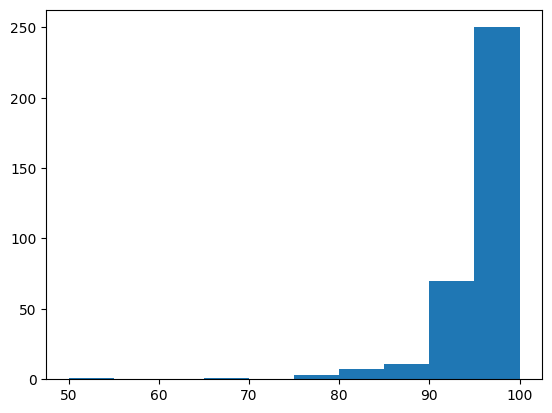

In [ ]:
plt.hist(df.Attper)

(array([  1.,   0.,   0.,   1.,   0.,   3.,   5.,   7.,  67., 259.]),
 array([3.91202301, 3.98133772, 4.05065244, 4.11996716, 4.18928188,
        4.2585966 , 4.32791131, 4.39722603, 4.46654075, 4.53585547,
        4.60517019]),
 <BarContainer object of 10 artists>)

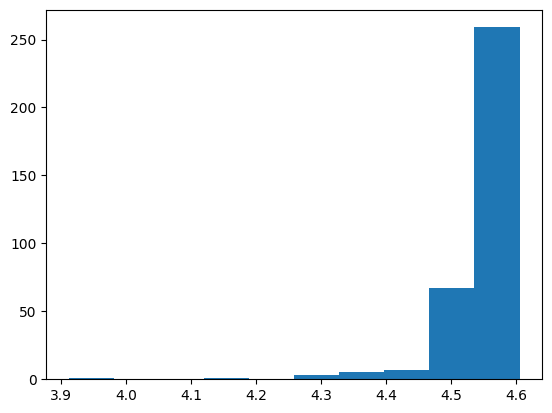

In [ ]:
df['Attper']=df['Attper'].apply(np.log, inplace=True)
plt.hist(df.Attper)